<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## 1. Boston Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

In [4]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

bos = bos.loc[bos["PRICE"] < 50.0]

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

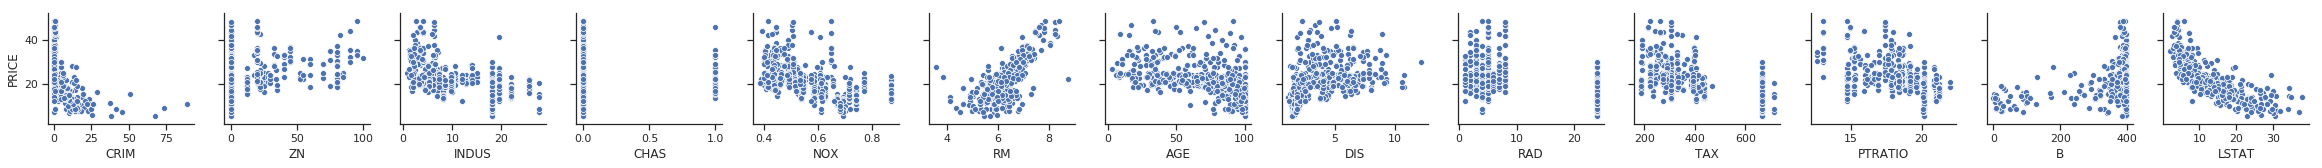

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(bos, 
                 x_vars=boston.feature_names,
                 y_vars=["PRICE"])
plt.show()

## 2. Dimension reduction with Principal component analysis (PCA)

From the dataset description we understand that there are 13 features. We want to visualize the PRICE in a two-dimensional space, the PRICE is in y-axis, so we want to reduce multiple features into one-dimensional as x_axis.

In [0]:
pca_features = ["CRIM","NOX","TAX","DIS","LSTAT"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.99692183])

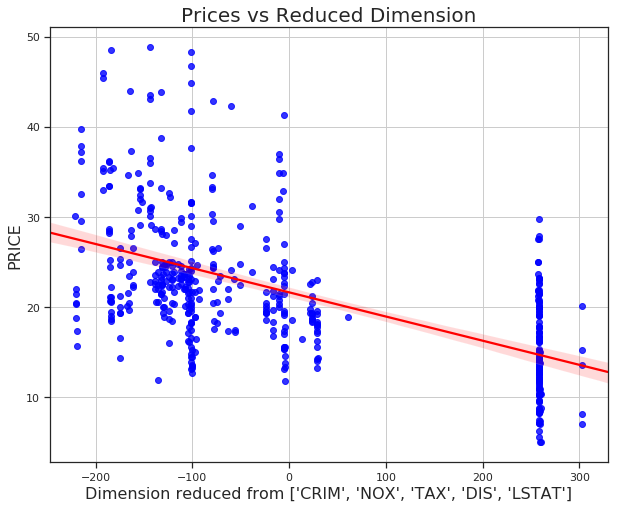

In [8]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()